### Questions
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers
<br><br>
+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular
<br><br>
+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year
<br><br>
+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels
<br><br>
+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers
<br><br>
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year
<br><br>
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses
<br><br>
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration


### EDA

In [156]:
# import packages 
import os 
from config import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [157]:
# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [158]:
# load the Dataset 
df = pd.read_csv(DATASET_PATH)

In [159]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [160]:
df.info()

# df.isna().sum()

'''
- There are no NaN records in the dataset.
- we need to convert 'published_timestamp' to datetime dtype.
- get new features from 'published_timestamp' like [year, month, day].

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   object
 4   price                3683 non-null   object
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


"\n- There are no NaN records in the dataset.\n- we need to convert 'published_timestamp' to datetime dtype.\n- get new features from 'published_timestamp' like [year, month, day].\n\n"

#### EDA on Subject/Category
+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Which subject is the most popular
	
	- Distribution of subjects per year
	- How many people purchase a particular subject

In [161]:
print("Subjects/Categories:")
for subject in df.subject.unique():
    print(f'- {subject}')

Subjects/Categories:
- Business Finance
- Graphic Design
- Musical Instruments
- Web Development


In [162]:
# How many courses per subject
df.subject.value_counts().to_frame()

,subject
Web Development,1200
Business Finance,1199
Musical Instruments,681
Graphic Design,603


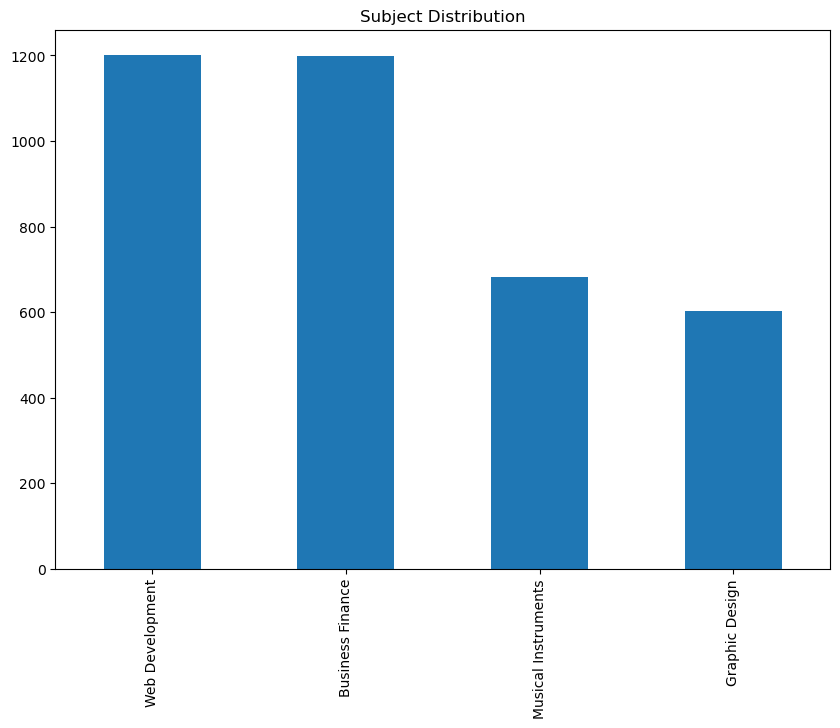

In [163]:
# Plot the distributaion of Subject count
plt.figure(figsize=(10, 7))
plt.title("Subject Distribution")
df.subject.value_counts().plot(kind='bar')
plt.show()

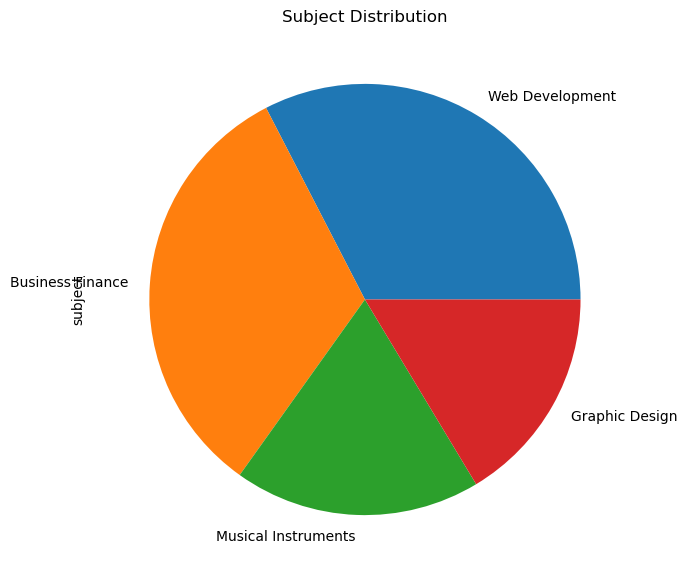

In [164]:
# Plot the distributaion of Subject count
plt.figure(figsize=(10, 7))
plt.title("Subject Distribution")
df.subject.value_counts().plot(kind='pie', )
plt.show()

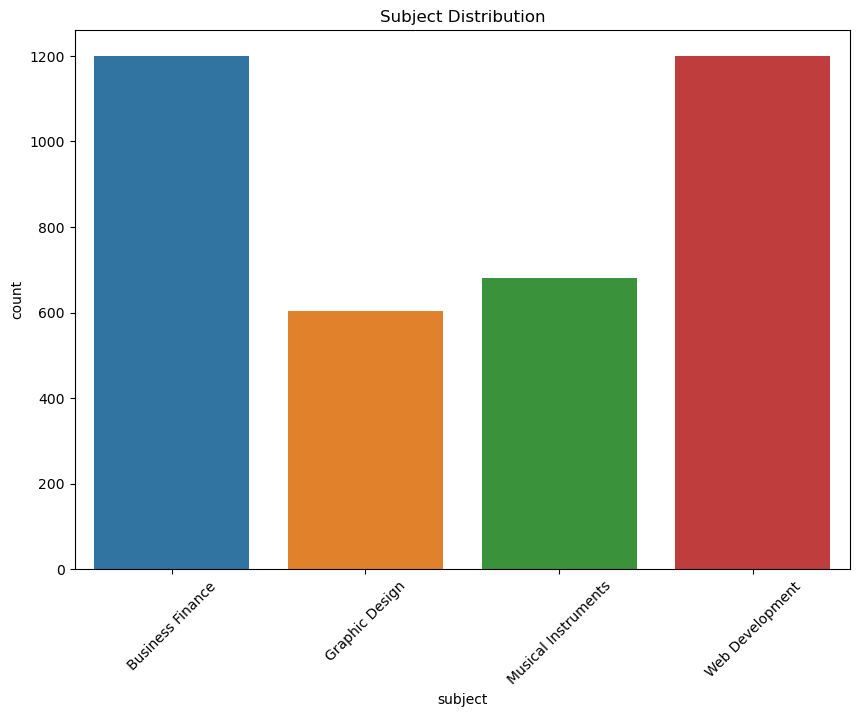

In [165]:
# Plot the distributaion of Subject count - using seaborn 
plt.figure(figsize=(10, 7))
sns.countplot(df.subject)
plt.title("Subject Distribution")
plt.xticks(rotation=45)
plt.show()


#### Narrative:
- Web Development and Business Finance is most popular out of the four.
- number of courses doesn't reflect the whole picture as we will see from number of subs per Subject

### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

In [166]:
# Number of subscribers per Subject
df.groupby('subject').num_subscribers.sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

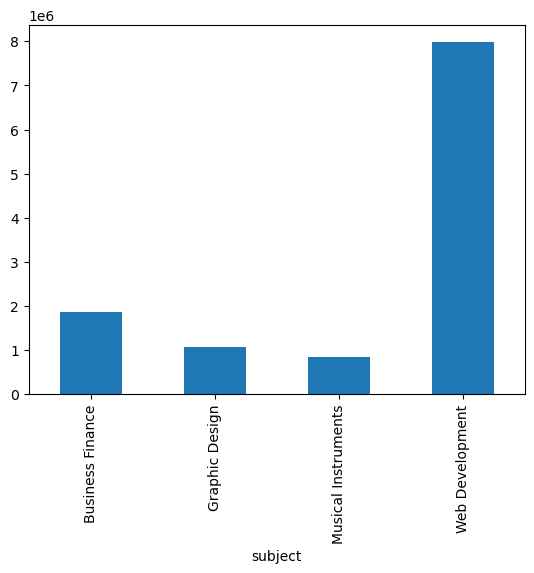

In [167]:
df.groupby('subject').num_subscribers.sum().plot(kind='bar')
plt.show()

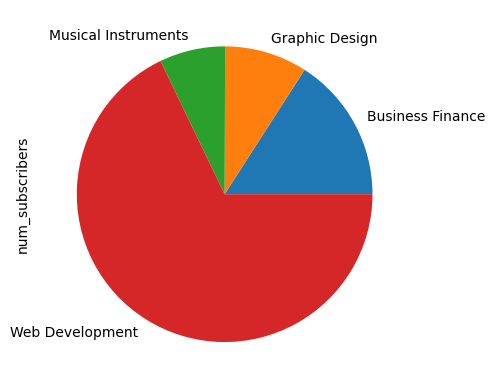

In [168]:
df.groupby('subject').num_subscribers.sum().plot(kind='pie')
plt.show()

#### Narrative:
- Web Developement have more subscribers that the other subects combined, although web development and Business finance have the same number of courses.
1. Web Development 
2. Business Finance 
3. Graphic Design 
4. Musical Instruments

In [169]:
# Total number of subscribers 
df.num_subscribers.sum()

11761186

In [170]:
# Average number of subscribers
round(df.num_subscribers.mean())

3193

In [171]:
# Min number of subscriber
df['num_subscribers'].min()

0

In [172]:
# Max number of subscriber
df['num_subscribers'].max()

268923

In [173]:
# What is the course that has the highest subs?

df.iloc[df['num_subscribers'].idxmax()]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2832, dtype: object

#### Narative:
- Highest subs course is: Learn HTML5 Programming From Scratch
- Maximum number of subs for a course: 268,923
- Udemy have around 12M subs in those 4 fields
- Average number of subs: 3200 

#### EDA on Levels
- How many levels do we have
- What is the distribution of courses per levels
- Which subject have the highest levels
- How many subscribers per levels
- How many courses per levels

In [174]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [175]:
df.level.value_counts()
# only one course with '52' as a level, we will drop that course

All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
52                       1
Name: level, dtype: int64

In [176]:
df[df.level == '52']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",https://www.udemy.com/learnguitartoworship/,TRUE,30,1463,29,52,Beginner Level,3 hours,Musical Instruments


In [177]:
# drop that course 
df.drop(labels=df[df.level == '52'].index, inplace=True)

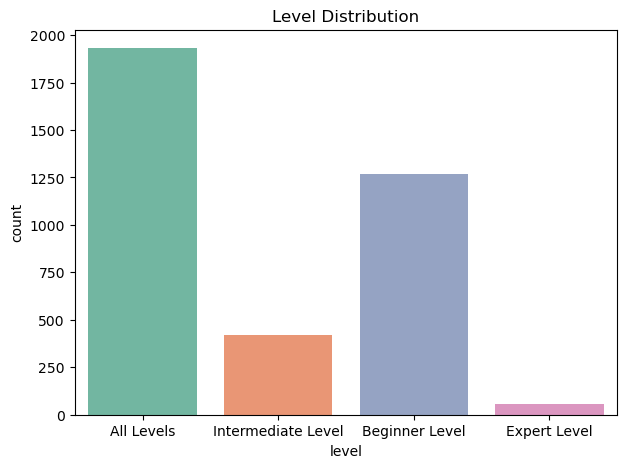

In [178]:
plt.figure(figsize=(7, 5))
sns.countplot(df.level, palette='Set2')
plt.title("Level Distribution")
plt.show()

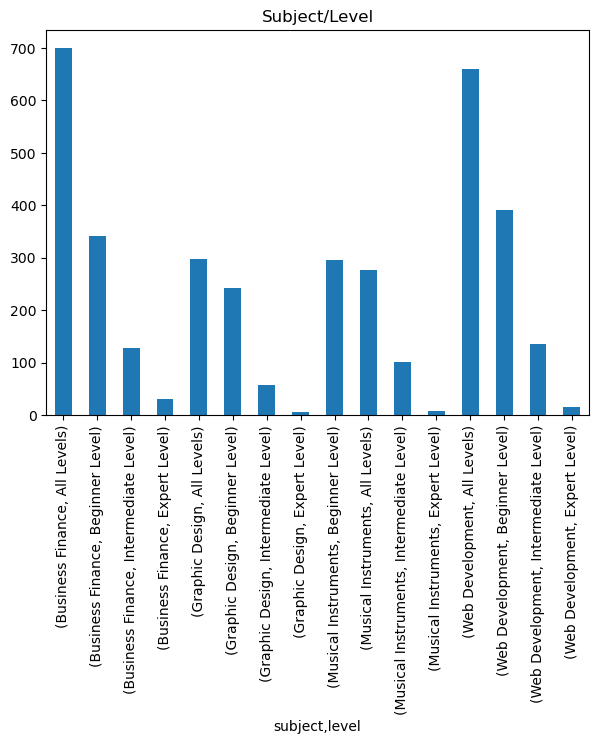

In [179]:
plt.figure(figsize=(7, 5))
df.groupby('subject')['level'].value_counts().plot(kind='bar')
plt.title("Subject/Level")
plt.show()

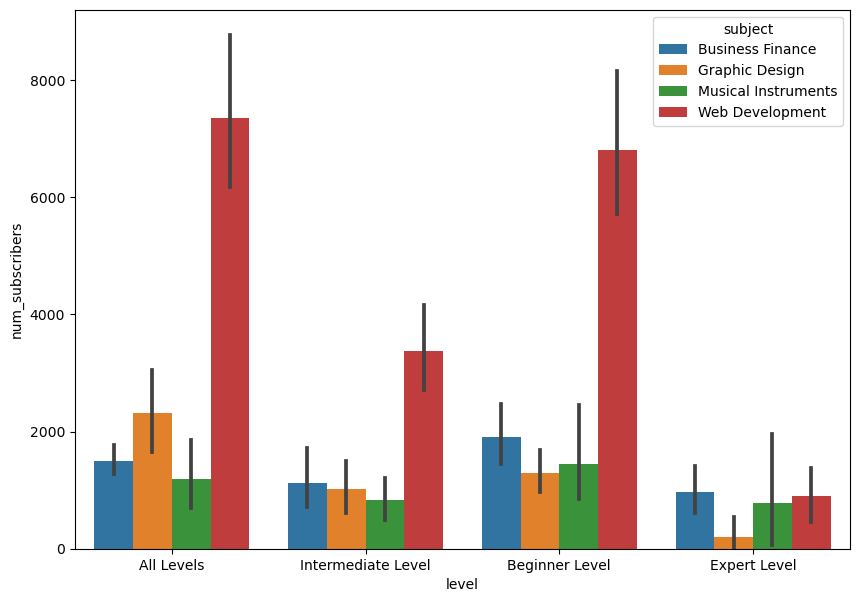

In [180]:
plt.figure(figsize=(10, 7))
sns.barplot(x='level', y='num_subscribers', hue='subject', data=df)
plt.show()

In [181]:
def plot_num_of_countable_feature(feature):
    # Using Seaborn 
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x='level',y=feature, hue='subject',data=df,ci=None)
    plt.show()
    plt.figure(figsize=(10,7))
    #  How many subscribers per levels
    plt.title("Plot of {} per level".format(feature))
    df.groupby('level')[feature].sum().plot(kind='pie')
    plt.show()

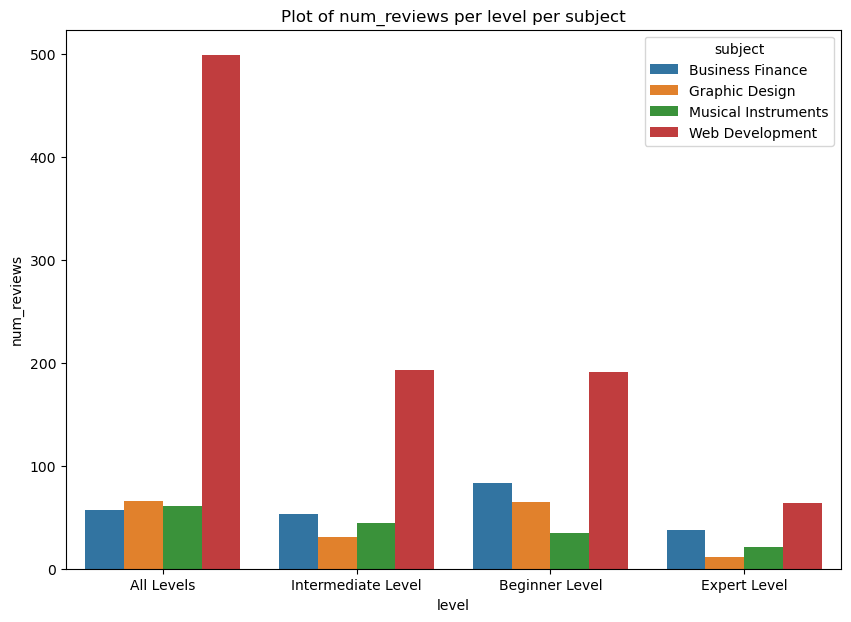

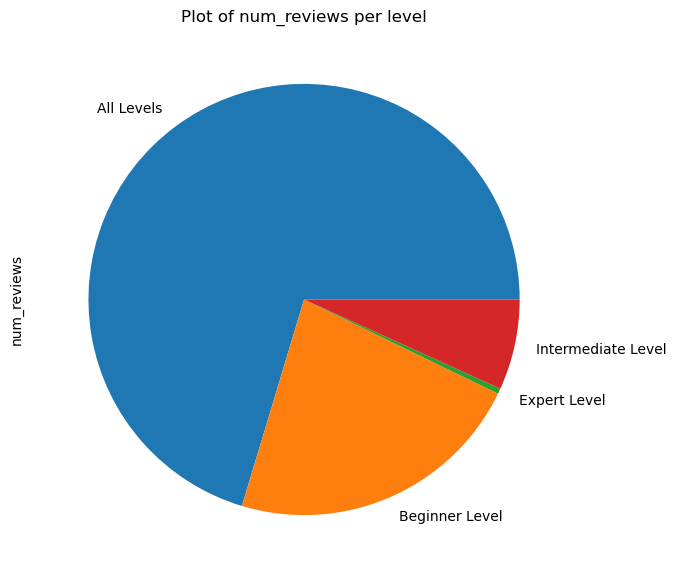

In [182]:
# Plot For the lectures * reviews
plot_num_of_countable_feature('num_reviews')

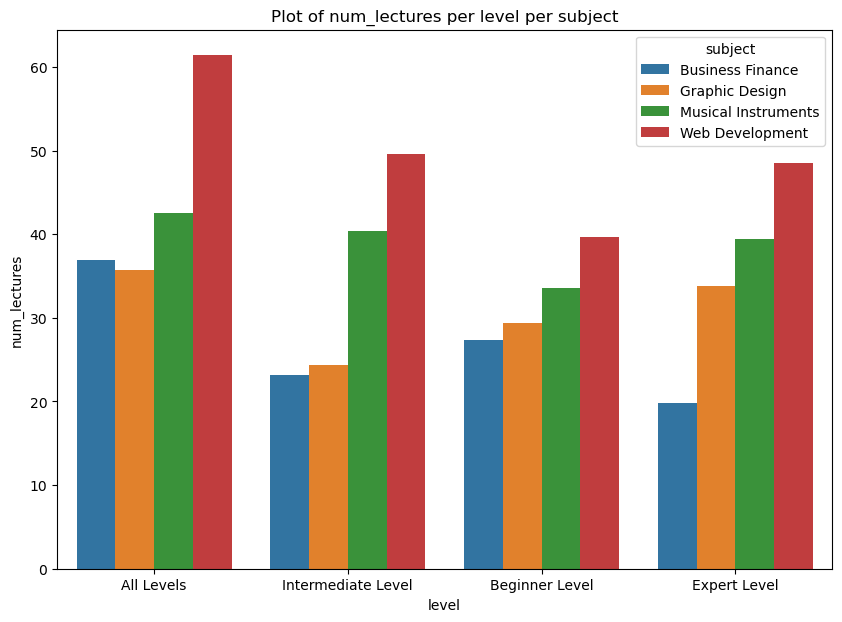

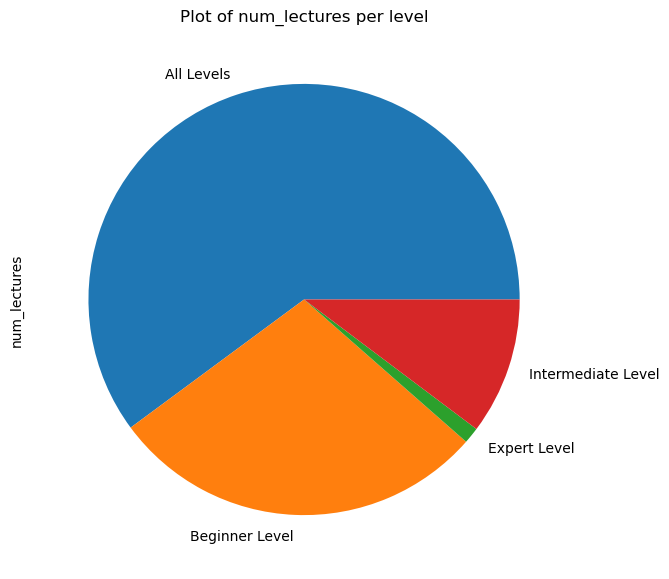

In [183]:
# Plot of lectures
plot_num_of_countable_feature('num_lectures')

### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses


In [184]:
df.price.dtype

dtype('O')

In [185]:
df.price = df.price.str.lower().str.replace('free', '0')

In [186]:
df.price = df.price.astype(float)

In [187]:
# What is the average price
print(f"Average course price: {round(df.price.mean())}")

Average course price: 66


In [188]:
# What is the max price
df.price.max()

200.0

In [189]:
df.iloc[  df.price.idxmax()  ]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [190]:
df['profit'] = df.price * df.num_subscribers

#### Narrative
- Most profitable course made 24 million $

In [191]:
# The location of course
df['profit'].idxmax()

3235

In [192]:
df.iloc[  df['profit'].idxmax()  ]

course_id                                                  164554
course_title                  AngularJS JumpStart with Dan Wahlin
url                    https://www.udemy.com/angularjs-jumpstart/
is_paid                                                      True
price                                                        75.0
num_subscribers                                             17802
num_reviews                                                  2144
num_lectures                                                  113
level                                                  All Levels
content_duration                                         10 hours
published_timestamp                          2014-03-24T17:31:15Z
subject                                           Web Development
profit                                                  1335150.0
Name: 3236, dtype: object

In [193]:
df.is_paid.unique()

array(['True', 'False', 'FALSE', 'TRUE'], dtype=object)

In [194]:
df.is_paid = df.is_paid.replace({"FALSE":'False', "TRUE": 'True' })

In [195]:
df.is_paid.unique()

array(['True', 'False'], dtype=object)

In [196]:

df['is_paid'].value_counts()

True     3372
False     310
Name: is_paid, dtype: int64

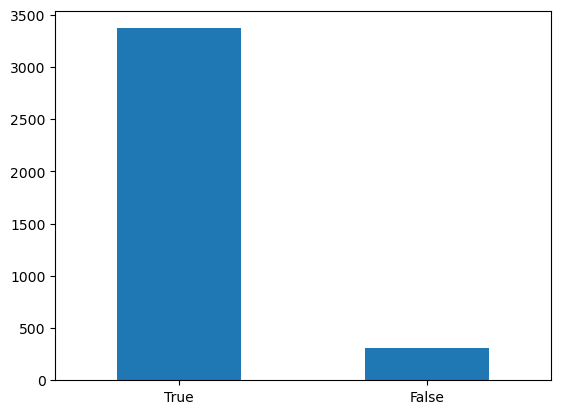

In [202]:
# How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

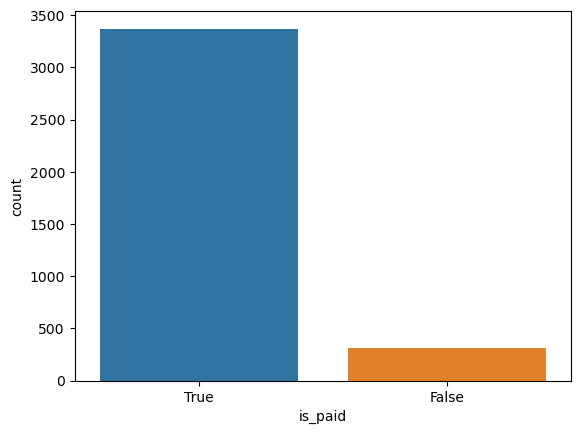

In [204]:
sns.countplot(df.is_paid)
plt.show()

<AxesSubplot:xlabel='is_paid,subject'>

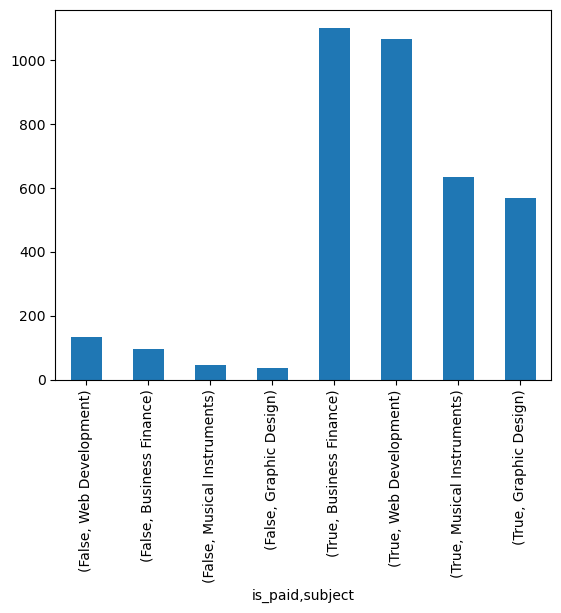

In [205]:
# How many paid/free course in each subject category
df.groupby('is_paid')['subject'].value_counts().plot(kind='bar')

In [209]:
sns.barplot(x='level',y='is_paid', hue='subject',data=df)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [210]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                 object
price                  float64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration        object
published_timestamp     object
subject                 object
profit                 float64
dtype: object

### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

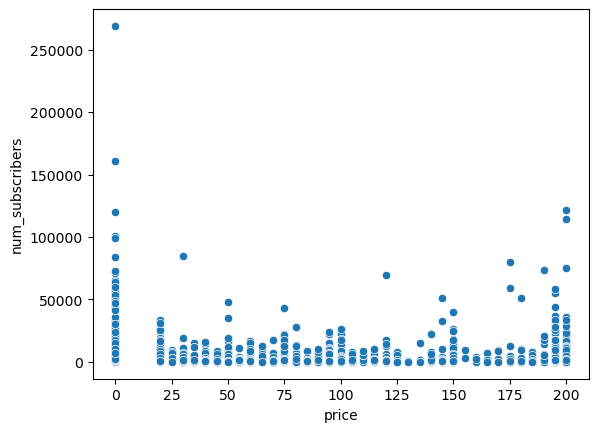

In [213]:
sns.scatterplot(data=df, x='price', y='num_subscribers')
plt.show()

In [224]:
df['published_timestamp'] = df['published_timestamp'].str.split('T').str.get(0)

In [229]:
df.published_timestamp = pd.to_datetime(df.published_timestamp)

In [231]:
df.published_timestamp.dtype

dtype('<M8[ns]')

In [234]:
df['year'] = df.published_timestamp.dt.year
df['month'] = df.published_timestamp.dt.month
df['day'] = df.published_timestamp.dt.day

In [235]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,year,month,dat,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18,Business Finance,429400.0,2017,1,18,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09,Business Finance,209400.0,2017,3,9,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19,Business Finance,97830.0,2016,12,19,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3 hours,2017-05-30,Business Finance,232845.0,2017,5,30,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2 hours,2016-12-13,Business Finance,255200.0,2016,12,13,13
